In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("combined_data.csv")

In [5]:
df

,title,level,experience,recruit_quantity,form_of_work,gender,describe,require,interest,company_name,company_link,job_link,salary
0,Data Engineer,Nhân viên,3 năm,3 người,Toàn thời gian,Không yêu cầu,• Data Quality Assurance: implement frameworks...,• 3+ years’ experience working with data as a ...,Salary: negotiable \nProbation: 2 months ( Ful...,CÔNG TY CỔ PHẦN BPO MẮT BÃO,https://www.topcv.vn/brand/bpomatbao?id=165027,https://www.topcv.vn/brand/bpomatbao/tuyen-dun...,Thoả thuận
1,Developer,Nhân viên,1 năm,2 người,Toàn thời gian,Không yêu cầu,System Development:- Implements feature custom...,- Degree in Programming/Software/IT/Computer S...,- Working time is only 5 days/week (from Monda...,Công ty Cho thuê tài chính TNHH MTV Quốc tế Ch...,https://www.topcv.vn/brand/chailease?id=27583,https://www.topcv.vn/brand/chailease/tuyen-dun...,Thoả thuận
2,Sales Manager / Business Development Manager,Trưởng/Phó phòng,Trên 5 năm,1 người,Toàn thời gian,Không yêu cầu,Manage and develop an organization's strategy ...,Graduation from University or above.At least 7...,Promotion opportunities & Salary increase ever...,CÔNG TY TNHH TRANSCOSMOS VIỆT NAM,https://www.topcv.vn/brand/chinhanhtranscosmos...,https://www.topcv.vn/brand/chinhanhtranscosmos...,Thoả thuận
3,Android Developer,Nhân viên,2 năm,1 người,Toàn thời gian,Không yêu cầu,"Xây dựng, phát triển và duy trì các ứng dụng t...",Giới tính: Nam/Nữ. Độ tuổi: 22 – 28.Theo học c...,Quan tâm đặc biệt tới nhân viênLương cạnh tran...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,Tới 25 triệu
4,Nhân Viên Hỗ Trợ Khách Hàng,Nhân viên,Không yêu cầu kinh nghiệm,2 người,Toàn thời gian,Không yêu cầu,• Tiếp nhận yêu cầu hỗ trợ và phản hồi của khá...,• Tốt nghiệp cao đẳng trở lên chuyên ngành Tài...,Quan tâm nhân viênLương tối thiểu 9 triệu/thán...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,9 - 12 triệu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,"Web Developers (C#, ASP.Net, MVC)",Nhân viên,2 năm,1 người,Toàn thời gian,Không yêu cầu,- Tham gia phát triển các dự án phát triển hệ ...,Tốt nghiệp Đại học/Cao đẳng chuyên ngành Công ...,Thu nhập tương xứng với năng lực: up 25 triệu/...,Công ty Cổ Phần Công Nghệ ITG,https://www.topcv.vn/cong-ty/cong-ty-co-phan-c...,https://www.topcv.vn/viec-lam/web-developers-c...,15 - 25 triệu
3338,Web\n System Engineer\n \n ...,Nhân viên,2 năm,4 người,Toàn thời gian,Không yêu cầu,Web system engineer đóng vai trò quan trọng tr...,Ứng viên có từ 2 năm kinh nghiệm làm việc tron...,Tham gia vào tất cả các giai đoạn phát triển p...,Công ty TNHH Otani U.P.,https://www.topcv.vn/cong-ty/cong-ty-tnhh-otan...,https://www.topcv.vn/viec-lam/web-system-engin...,Thoả thuận
3339,Website Manager (SEO &\n Content\n ...,Nhân viên,1 năm,1 người,Toàn thời gian,Không yêu cầu,Are you a driven individual with a passion for...,Minimum 1 years of experience in SEO or conten...,Salary: Starting from $500/month with performa...,BSS Group,https://www.topcv.vn/cong-ty/bss-group/405.html,https://www.topcv.vn/viec-lam/website-manager-...,Trên 500 USD
3340,Winform\n Developer,Nhân viên,1 năm,1 người,Toàn thời gian,Không yêu cầu,● Trực tiếp tham gia vào quá trình tạo dựng sả...,Tốt nghiệp ĐH/CĐ chuyên ngành CNTT (phần mềm) ...,"Mức lương: Cạnh tranh, thỏa thuận theo năng lự...",Công Ty CP THL One,https://www.topcv.vn/cong-ty/cong-ty-cp-thl-on...,https://www.topcv.vn/viec-lam/winform-develope...,Tới 25 triệu


In [7]:
# kiểm tra xem có dữ liệu nào bị thiếu không
df.isnull().sum()

title               0
level               0
experience          0
recruit_quantity    0
form_of_work        0
gender              0
describe            0
require             0
interest            0
company_name        0
company_link        0
job_link            0
salary              0
dtype: int64

In [9]:
df.shape

(3342, 13)

In [15]:
# kiểm tra xem có dữ liệu nào bị trùng không
df.duplicated(subset=['job_link'], keep=False).sum()

0

1. Không đồng nhất về định dạng trong cột "salary"
 Cột salary chứa dữ liệu không đồng nhất, bao gồm các khoảng lương như "9 - 12 triệu", "400 - 800 USD", và các giá trị mơ hồ như "Thoả thuận"
2. Dữ liệu về đơn vị tiền tệ khác nhau
 Cột salary chứa cả hai loại đơn vị tiền tệ khác nhau (VND và USD)

In [17]:
import re

# Hàm chuyển đổi khoảng lương thành trung bình và chuyển đổi sang triệu đồng
def convert_salary_to_trieu(salary_str):
    # Chuyển đổi các giá trị "USD" sang triệu đồng với giả định tỷ giá là 0.023 triệu đồng/USD
    exchange_rate_trieu = 0.023  # 23,000 VND/USD -> 0.023 triệu đồng/USD
    
    # Xử lý các khoảng lương (ví dụ: "9 - 12 triệu", "400 - 800 usd")
    match = re.match(r'(\d+)\s*-\s*(\d+)\s*(triệu|usd)', salary_str, re.IGNORECASE)
    if match:
        lower, upper, currency = match.groups()
        lower = float(lower)
        upper = float(upper)
        avg_salary = (lower + upper) / 2
        
        # Chuyển đổi sang triệu đồng nếu là USD
        if currency.lower() == 'usd':
            avg_salary *= exchange_rate_trieu
        
        # Nếu là triệu, giữ nguyên
        return avg_salary
    
    # Xử lý các giá trị cụ thể (ví dụ: "10 triệu", "2,000 usd")
    match = re.match(r'(\d+)\s*(triệu|usd)', salary_str, re.IGNORECASE)
    if match:
        salary, currency = match.groups()
        salary = float(salary)
        
        if currency.lower() == 'usd':
            return salary * exchange_rate_trieu
        else:
            return salary  # Đã là triệu đồng, không cần chuyển đổi
    
    return None

# Áp dụng hàm cho cột 'salary'
df['salary_trieudong'] = df['salary'].apply(convert_salary_to_trieu)

# Tính giá trị trung bình của các giá trị salary_trieu đã được chuyển đổi (loại bỏ None)
average_salary_trieu = df['salary_trieudong'].mean()

# Thay thế các giá trị None (các trường hợp "Thoả thuận") bằng giá trị trung bình đã tính
df['salary_trieudong'].fillna(average_salary_trieu, inplace=True)

# Kiểm tra kết quả
df[['salary', 'salary_trieudong']].head()



,salary,salary_trieudong
0,Thoả thuận,19.066119
1,Thoả thuận,19.066119
2,Thoả thuận,19.066119
3,Tới 25 triệu,19.066119
4,9 - 12 triệu,10.500000


### Để chuẩn hóa cột salary, bạn có thể thực hiện các bước sau:

1. Tách các khoảng lương: Chuyển đổi các khoảng lương (vd: "9 - 12 triệu") thành giá trị trung bình.
2. Chuyển đổi tiền tệ: Quy đổi tất cả các giá trị USD sang triệu VND.
3. Xử lý các giá trị không xác định: Xử lý các giá trị như "Thoả thuận" bằng cách thay thế bằng giá trị trung bình hoặc loại bỏ chúng.

In [19]:
df

,title,level,experience,recruit_quantity,form_of_work,gender,describe,require,interest,company_name,company_link,job_link,salary,salary_trieudong
0,Data Engineer,Nhân viên,3 năm,3 người,Toàn thời gian,Không yêu cầu,• Data Quality Assurance: implement frameworks...,• 3+ years’ experience working with data as a ...,Salary: negotiable \nProbation: 2 months ( Ful...,CÔNG TY CỔ PHẦN BPO MẮT BÃO,https://www.topcv.vn/brand/bpomatbao?id=165027,https://www.topcv.vn/brand/bpomatbao/tuyen-dun...,Thoả thuận,19.066119
1,Developer,Nhân viên,1 năm,2 người,Toàn thời gian,Không yêu cầu,System Development:- Implements feature custom...,- Degree in Programming/Software/IT/Computer S...,- Working time is only 5 days/week (from Monda...,Công ty Cho thuê tài chính TNHH MTV Quốc tế Ch...,https://www.topcv.vn/brand/chailease?id=27583,https://www.topcv.vn/brand/chailease/tuyen-dun...,Thoả thuận,19.066119
2,Sales Manager / Business Development Manager,Trưởng/Phó phòng,Trên 5 năm,1 người,Toàn thời gian,Không yêu cầu,Manage and develop an organization's strategy ...,Graduation from University or above.At least 7...,Promotion opportunities & Salary increase ever...,CÔNG TY TNHH TRANSCOSMOS VIỆT NAM,https://www.topcv.vn/brand/chinhanhtranscosmos...,https://www.topcv.vn/brand/chinhanhtranscosmos...,Thoả thuận,19.066119
3,Android Developer,Nhân viên,2 năm,1 người,Toàn thời gian,Không yêu cầu,"Xây dựng, phát triển và duy trì các ứng dụng t...",Giới tính: Nam/Nữ. Độ tuổi: 22 – 28.Theo học c...,Quan tâm đặc biệt tới nhân viênLương cạnh tran...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,Tới 25 triệu,19.066119
4,Nhân Viên Hỗ Trợ Khách Hàng,Nhân viên,Không yêu cầu kinh nghiệm,2 người,Toàn thời gian,Không yêu cầu,• Tiếp nhận yêu cầu hỗ trợ và phản hồi của khá...,• Tốt nghiệp cao đẳng trở lên chuyên ngành Tài...,Quan tâm nhân viênLương tối thiểu 9 triệu/thán...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,9 - 12 triệu,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,"Web Developers (C#, ASP.Net, MVC)",Nhân viên,2 năm,1 người,Toàn thời gian,Không yêu cầu,- Tham gia phát triển các dự án phát triển hệ ...,Tốt nghiệp Đại học/Cao đẳng chuyên ngành Công ...,Thu nhập tương xứng với năng lực: up 25 triệu/...,Công ty Cổ Phần Công Nghệ ITG,https://www.topcv.vn/cong-ty/cong-ty-co-phan-c...,https://www.topcv.vn/viec-lam/web-developers-c...,15 - 25 triệu,20.000000
3338,Web\n System Engineer\n \n ...,Nhân viên,2 năm,4 người,Toàn thời gian,Không yêu cầu,Web system engineer đóng vai trò quan trọng tr...,Ứng viên có từ 2 năm kinh nghiệm làm việc tron...,Tham gia vào tất cả các giai đoạn phát triển p...,Công ty TNHH Otani U.P.,https://www.topcv.vn/cong-ty/cong-ty-tnhh-otan...,https://www.topcv.vn/viec-lam/web-system-engin...,Thoả thuận,19.066119
3339,Website Manager (SEO &\n Content\n ...,Nhân viên,1 năm,1 người,Toàn thời gian,Không yêu cầu,Are you a driven individual with a passion for...,Minimum 1 years of experience in SEO or conten...,Salary: Starting from $500/month with performa...,BSS Group,https://www.topcv.vn/cong-ty/bss-group/405.html,https://www.topcv.vn/viec-lam/website-manager-...,Trên 500 USD,19.066119
3340,Winform\n Developer,Nhân viên,1 năm,1 người,Toàn thời gian,Không yêu cầu,● Trực tiếp tham gia vào quá trình tạo dựng sả...,Tốt nghiệp ĐH/CĐ chuyên ngành CNTT (phần mềm) ...,"Mức lương: Cạnh tranh, thỏa thuận theo năng lự...",Công Ty CP THL One,https://www.topcv.vn/cong-ty/cong-ty-cp-thl-on...,https://www.topcv.vn/viec-lam/winform-develope...,Tới 25 triệu,19.066119


### Số liệu tuyển dụng không đồng nhất
Lỗi: Cột recruit_quantity chứa dữ liệu dạng văn bản, ví dụ: "3 người", "Không yêu cầu"
- Cách giải quyết: thay thế các giá trị như "Không yêu cầu" bằng "unknown" , Xử lý các trường hợp có số (ví dụ: "3 người", "10 nhân viên")

In [21]:
# Chuẩn hóa tên công ty: loại bỏ khoảng trắng thừa và chuyển tất cả thành chữ thường
df['company_name'] = df['company_name'].str.strip()
# Xử lý cột recruit_quantity để chuyển dữ liệu về dạng số
df['recruit_quantity'] = df['recruit_quantity'].str.extract('(\d+)').astype(int)

In [25]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [27]:
df = df.replace(r'\s+', ' ', regex=True)  # Loại bỏ dấu xuống dòng và thay bằng khoảng trắng

In [29]:
df.shape

(3342, 14)

In [31]:
df

,title,level,experience,recruit_quantity,form_of_work,gender,describe,require,interest,company_name,company_link,job_link,salary,salary_trieudong
0,Data Engineer,Nhân viên,3 năm,3,Toàn thời gian,Không yêu cầu,• Data Quality Assurance: implement frameworks...,• 3+ years’ experience working with data as a ...,Salary: negotiable Probation: 2 months ( Full ...,CÔNG TY CỔ PHẦN BPO MẮT BÃO,https://www.topcv.vn/brand/bpomatbao?id=165027,https://www.topcv.vn/brand/bpomatbao/tuyen-dun...,Thoả thuận,19.066119
1,Developer,Nhân viên,1 năm,2,Toàn thời gian,Không yêu cầu,System Development:- Implements feature custom...,- Degree in Programming/Software/IT/Computer S...,- Working time is only 5 days/week (from Monda...,Công ty Cho thuê tài chính TNHH MTV Quốc tế Ch...,https://www.topcv.vn/brand/chailease?id=27583,https://www.topcv.vn/brand/chailease/tuyen-dun...,Thoả thuận,19.066119
2,Sales Manager / Business Development Manager,Trưởng/Phó phòng,Trên 5 năm,1,Toàn thời gian,Không yêu cầu,Manage and develop an organization's strategy ...,Graduation from University or above.At least 7...,Promotion opportunities & Salary increase ever...,CÔNG TY TNHH TRANSCOSMOS VIỆT NAM,https://www.topcv.vn/brand/chinhanhtranscosmos...,https://www.topcv.vn/brand/chinhanhtranscosmos...,Thoả thuận,19.066119
3,Android Developer,Nhân viên,2 năm,1,Toàn thời gian,Không yêu cầu,"Xây dựng, phát triển và duy trì các ứng dụng t...",Giới tính: Nam/Nữ. Độ tuổi: 22 – 28.Theo học c...,Quan tâm đặc biệt tới nhân viênLương cạnh tran...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,Tới 25 triệu,19.066119
4,Nhân Viên Hỗ Trợ Khách Hàng,Nhân viên,Không yêu cầu kinh nghiệm,2,Toàn thời gian,Không yêu cầu,• Tiếp nhận yêu cầu hỗ trợ và phản hồi của khá...,• Tốt nghiệp cao đẳng trở lên chuyên ngành Tài...,Quan tâm nhân viênLương tối thiểu 9 triệu/thán...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,9 - 12 triệu,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,"Web Developers (C#, ASP.Net, MVC)",Nhân viên,2 năm,1,Toàn thời gian,Không yêu cầu,- Tham gia phát triển các dự án phát triển hệ ...,Tốt nghiệp Đại học/Cao đẳng chuyên ngành Công ...,Thu nhập tương xứng với năng lực: up 25 triệu/...,Công ty Cổ Phần Công Nghệ ITG,https://www.topcv.vn/cong-ty/cong-ty-co-phan-c...,https://www.topcv.vn/viec-lam/web-developers-c...,15 - 25 triệu,20.000000
3338,Web System Engineer Fullstack (VueJS/Python),Nhân viên,2 năm,4,Toàn thời gian,Không yêu cầu,Web system engineer đóng vai trò quan trọng tr...,Ứng viên có từ 2 năm kinh nghiệm làm việc tron...,Tham gia vào tất cả các giai đoạn phát triển p...,Công ty TNHH Otani U.P.,https://www.topcv.vn/cong-ty/cong-ty-tnhh-otan...,https://www.topcv.vn/viec-lam/web-system-engin...,Thoả thuận,19.066119
3339,Website Manager (SEO & Content Focus),Nhân viên,1 năm,1,Toàn thời gian,Không yêu cầu,Are you a driven individual with a passion for...,Minimum 1 years of experience in SEO or conten...,Salary: Starting from $500/month with performa...,BSS Group,https://www.topcv.vn/cong-ty/bss-group/405.html,https://www.topcv.vn/viec-lam/website-manager-...,Trên 500 USD,19.066119
3340,Winform Developer,Nhân viên,1 năm,1,Toàn thời gian,Không yêu cầu,● Trực tiếp tham gia vào quá trình tạo dựng sả...,Tốt nghiệp ĐH/CĐ chuyên ngành CNTT (phần mềm) ...,"Mức lương: Cạnh tranh, thỏa thuận theo năng lự...",Công Ty CP THL One,https://www.topcv.vn/cong-ty/cong-ty-cp-thl-on...,https://www.topcv.vn/viec-lam/winform-develope...,Tới 25 triệu,19.066119


In [33]:
# Xóa các dòng dữ liệu chứa chữ 'biên tập', 'video' , 
df = df[~df['describe'].str.contains('biên tập')]
df = df[~df['describe'].str.contains('video')]
df = df[~df['describe'].str.contains('Biên tập')]
df = df[~df['describe'].str.contains('Video')]

df.shape

(3217, 14)

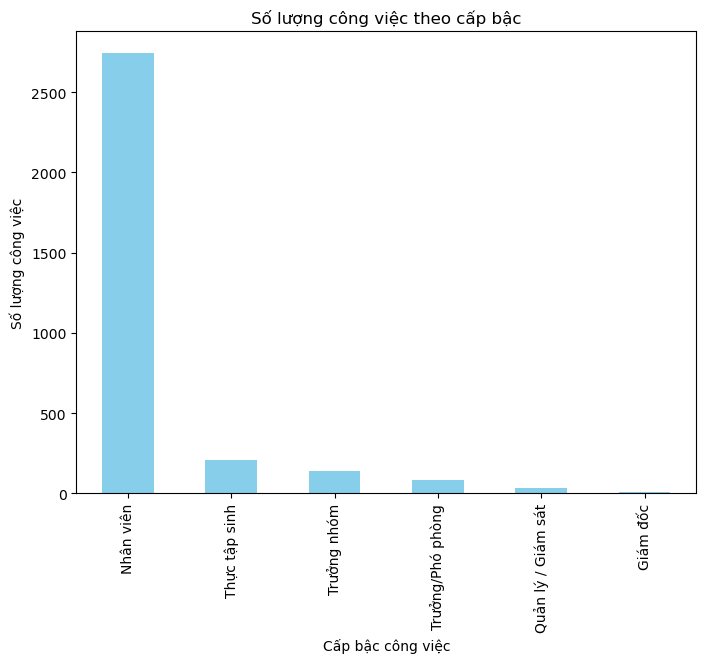

In [35]:
# 1. Thống kê số lượng công việc theo 'level'
level_count = df['level'].value_counts()
plt.figure(figsize=(8, 6))
level_count.plot(kind='bar', color='skyblue')
plt.title('Số lượng công việc theo cấp bậc')
plt.xlabel('Cấp bậc công việc')
plt.ylabel('Số lượng công việc')
plt.show()

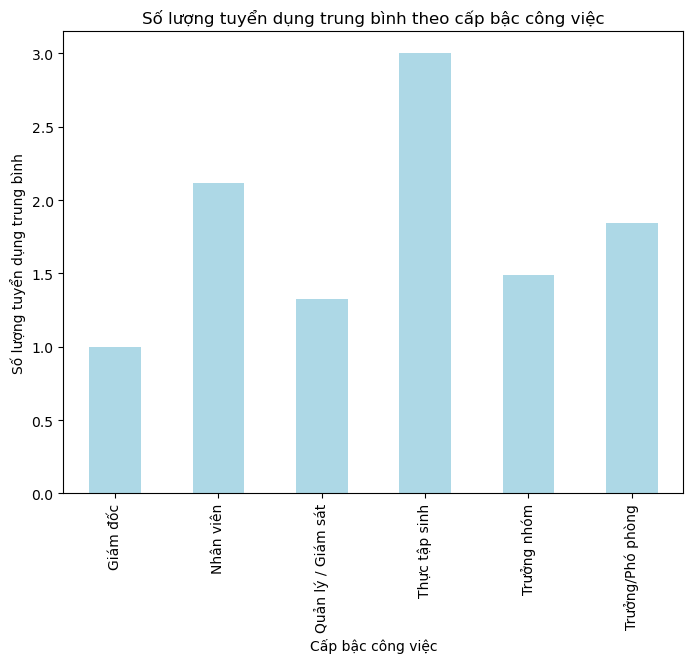

In [37]:
# Tính trung bình số lượng tuyển dụng theo từng cấp bậc công việc
avg_recruit_by_level = df.groupby('level')['recruit_quantity'].mean()

plt.figure(figsize=(8, 6))
avg_recruit_by_level.plot(kind='bar', color='lightblue')
plt.title('Số lượng tuyển dụng trung bình theo cấp bậc công việc')
plt.xlabel('Cấp bậc công việc')
plt.ylabel('Số lượng tuyển dụng trung bình')
plt.show()


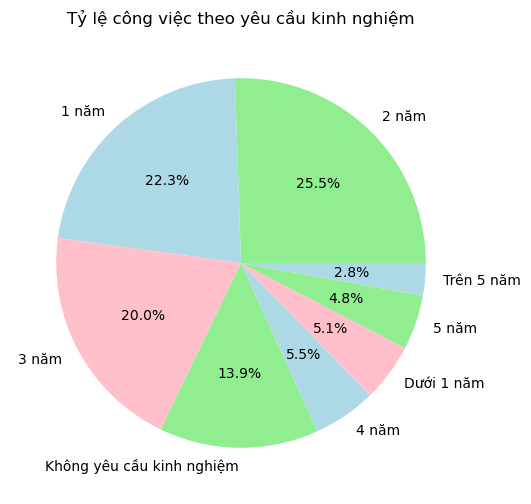

In [39]:
# 2. Phân tích yêu cầu về 'experience'
experience_count = df['experience'].value_counts()
plt.figure(figsize=(8, 6))
experience_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'pink'])
plt.title('Tỷ lệ công việc theo yêu cầu kinh nghiệm')
plt.ylabel('')
plt.show()

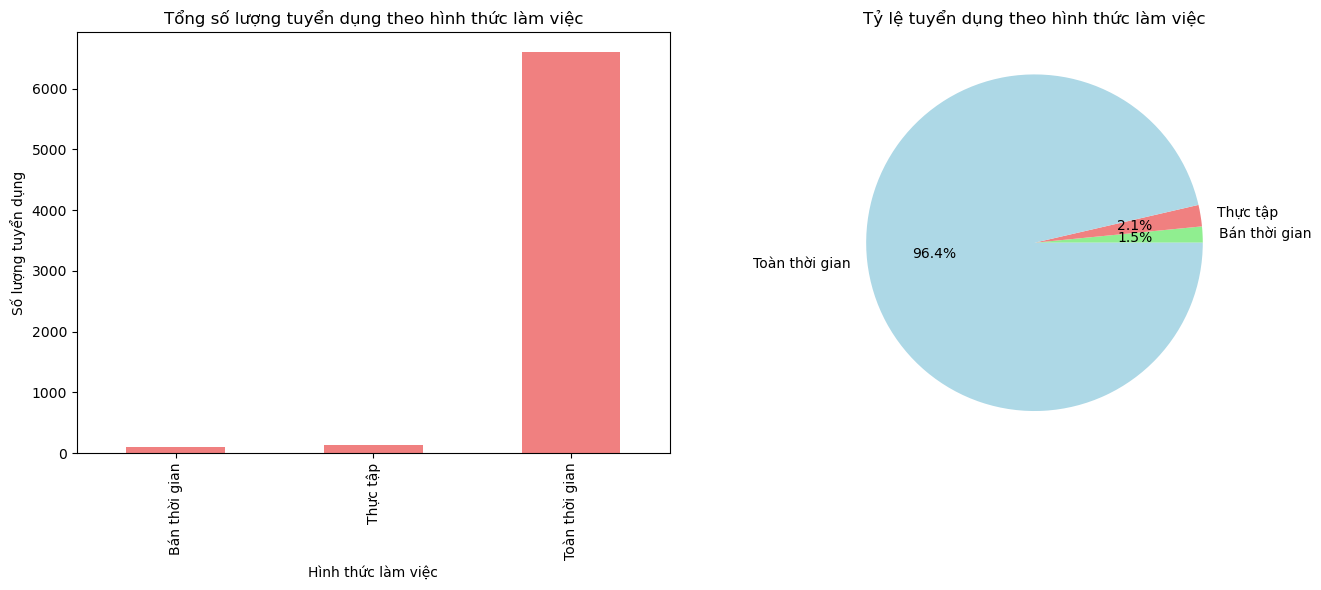

In [41]:
# Tính tổng số lượng tuyển dụng theo hình thức làm việc
recruit_by_form = df.groupby('form_of_work')['recruit_quantity'].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ cột
recruit_by_form.plot(kind='bar', color='lightcoral', ax=axes[0])
axes[0].set_title('Tổng số lượng tuyển dụng theo hình thức làm việc')
axes[0].set_xlabel('Hình thức làm việc')
axes[0].set_ylabel('Số lượng tuyển dụng')

# Biểu đồ tròn
recruit_by_form.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'], ax=axes[1])
axes[1].set_title('Tỷ lệ tuyển dụng theo hình thức làm việc')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


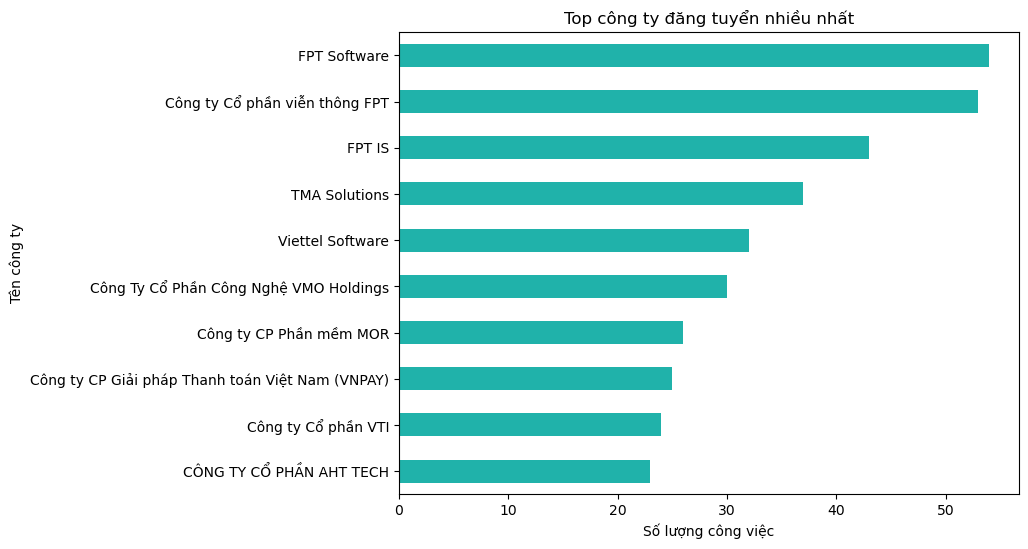

In [43]:
top_companies = df['company_name'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
top_companies.plot(kind='barh', color='lightseagreen')
plt.title('Top công ty đăng tuyển nhiều nhất')
plt.xlabel('Số lượng công việc')
plt.ylabel('Tên công ty')
plt.gca().invert_yaxis()  
plt.show()

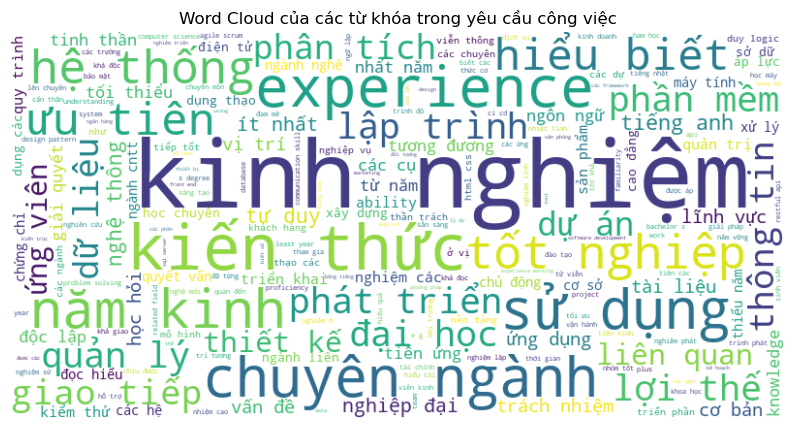

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Chuẩn bị dữ liệu tương tự như trong phân tích từ khóa trước
stop_words = set([
    'và', 'hoặc', 'có', 'là', 'của', 'với', 'trong', 'cho', 'một', 'những',
    'tại', 'để', 'khi', 'thì', 'làm', 'cần', 'yêu', 'cầu', 
    'kỹ', 'năng', 'công', 'việc', 'về', 'trở', 'thành'
])

# Tách từ trong cột 'require'
all_requirements = ' '.join(df['require'].dropna().tolist()).lower()
words = re.findall(r'\w+', all_requirements)

# Loại bỏ stop words
filtered_words = [word for word in words if word not in stop_words]

# Kết nối lại các từ sau khi loại bỏ stop words
filtered_text = ' '.join(filtered_words)

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(filtered_text)

# Vẽ WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud của các từ khóa trong yêu cầu công việc')
plt.show()


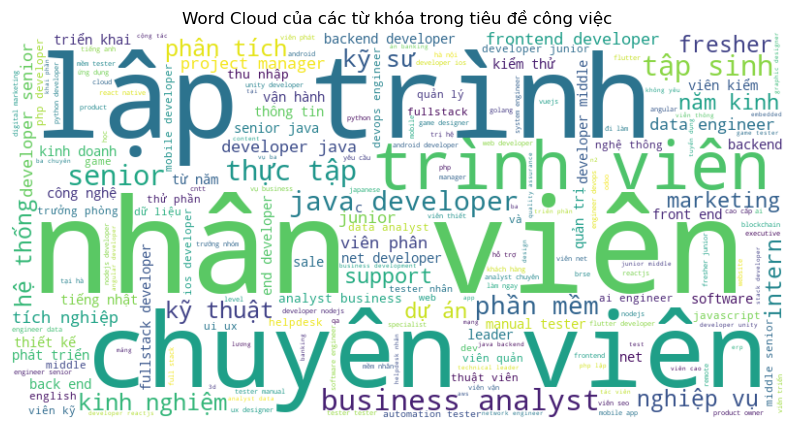

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Tách từ trong cột 'title'
all_requirements = ' '.join(df['title'].dropna().tolist()).lower()
words = re.findall(r'\w+', all_requirements)

# Kết nối lại các từ sau khi loại bỏ stop words
filtered_text = ' '.join(words)

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(filtered_text)

# Vẽ WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud của các từ khóa trong tiêu đề công việc')
plt.show()


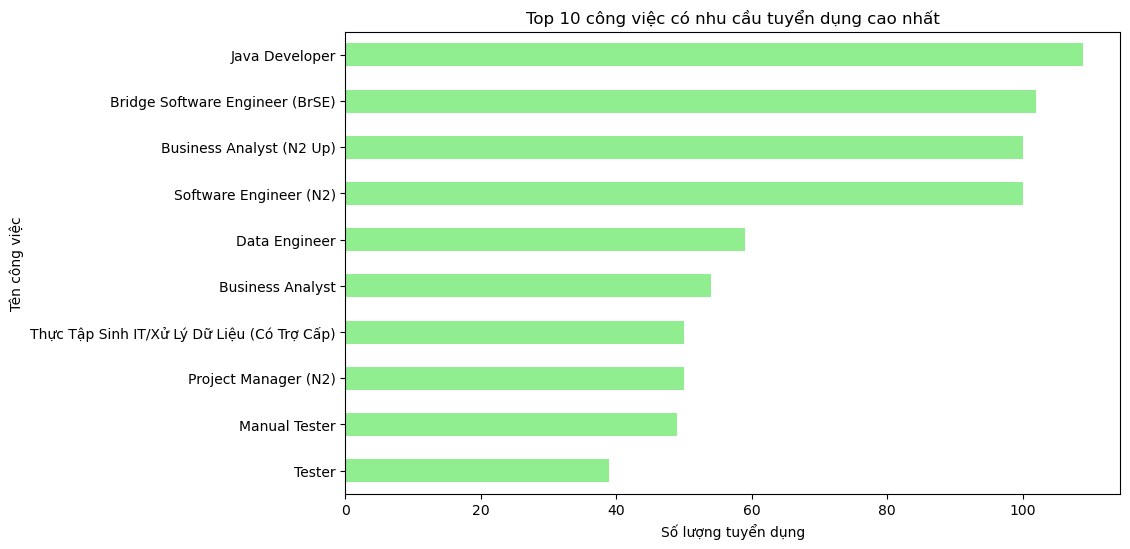

In [49]:
# Tính tổng số lượng tuyển dụng theo 'title'
top_jobs = df.groupby('title')['recruit_quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_jobs.plot(kind='barh', color='lightgreen')
plt.title('Top 10 công việc có nhu cầu tuyển dụng cao nhất')
plt.xlabel('Số lượng tuyển dụng')
plt.ylabel('Tên công việc')
plt.gca().invert_yaxis()
plt.show()

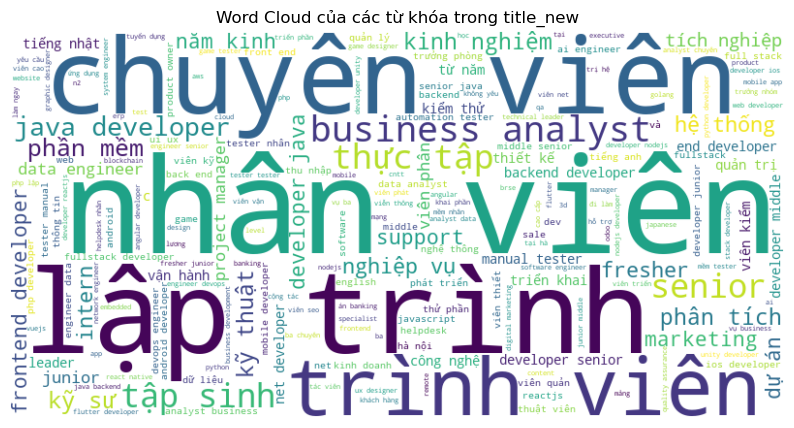

In [53]:
# wordcloud của title_new
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Tách từ trong cột 'title_new'
all_requirements = ' '.join(df['title'].dropna().tolist()).lower()
words = re.findall(r'\w+', all_requirements)

# Kết nối lại các từ sau khi loại bỏ stop words
filtered_text = ' '.join(words)

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(filtered_text)

# Vẽ WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud của các từ khóa trong title_new')
plt.show()

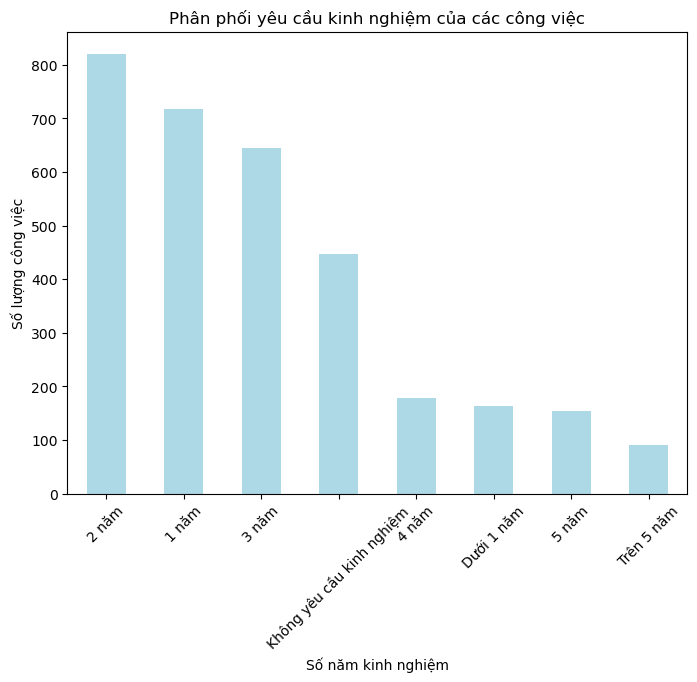

In [55]:
# Đếm tần suất các yêu cầu kinh nghiệm
experience_count = df['experience'].value_counts()

plt.figure(figsize=(8, 6))
experience_count.plot(kind='bar', color='lightblue')
plt.title('Phân phối yêu cầu kinh nghiệm của các công việc')
plt.xlabel('Số năm kinh nghiệm')
plt.ylabel('Số lượng công việc')
plt.xticks(rotation=45)
plt.show()


In [57]:
df

,title,level,experience,recruit_quantity,form_of_work,gender,describe,require,interest,company_name,company_link,job_link,salary,salary_trieudong
0,Data Engineer,Nhân viên,3 năm,3,Toàn thời gian,Không yêu cầu,• Data Quality Assurance: implement frameworks...,• 3+ years’ experience working with data as a ...,Salary: negotiable Probation: 2 months ( Full ...,CÔNG TY CỔ PHẦN BPO MẮT BÃO,https://www.topcv.vn/brand/bpomatbao?id=165027,https://www.topcv.vn/brand/bpomatbao/tuyen-dun...,Thoả thuận,19.066119
1,Developer,Nhân viên,1 năm,2,Toàn thời gian,Không yêu cầu,System Development:- Implements feature custom...,- Degree in Programming/Software/IT/Computer S...,- Working time is only 5 days/week (from Monda...,Công ty Cho thuê tài chính TNHH MTV Quốc tế Ch...,https://www.topcv.vn/brand/chailease?id=27583,https://www.topcv.vn/brand/chailease/tuyen-dun...,Thoả thuận,19.066119
2,Sales Manager / Business Development Manager,Trưởng/Phó phòng,Trên 5 năm,1,Toàn thời gian,Không yêu cầu,Manage and develop an organization's strategy ...,Graduation from University or above.At least 7...,Promotion opportunities & Salary increase ever...,CÔNG TY TNHH TRANSCOSMOS VIỆT NAM,https://www.topcv.vn/brand/chinhanhtranscosmos...,https://www.topcv.vn/brand/chinhanhtranscosmos...,Thoả thuận,19.066119
3,Android Developer,Nhân viên,2 năm,1,Toàn thời gian,Không yêu cầu,"Xây dựng, phát triển và duy trì các ứng dụng t...",Giới tính: Nam/Nữ. Độ tuổi: 22 – 28.Theo học c...,Quan tâm đặc biệt tới nhân viênLương cạnh tran...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,Tới 25 triệu,19.066119
4,Nhân Viên Hỗ Trợ Khách Hàng,Nhân viên,Không yêu cầu kinh nghiệm,2,Toàn thời gian,Không yêu cầu,• Tiếp nhận yêu cầu hỗ trợ và phản hồi của khá...,• Tốt nghiệp cao đẳng trở lên chuyên ngành Tài...,Quan tâm nhân viênLương tối thiểu 9 triệu/thán...,Công ty Cổ phần MISA,https://www.topcv.vn/brand/congtycophanmisa?id...,https://www.topcv.vn/brand/congtycophanmisa/tu...,9 - 12 triệu,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,"Web Developers (C#, ASP.Net, MVC)",Nhân viên,2 năm,1,Toàn thời gian,Không yêu cầu,- Tham gia phát triển các dự án phát triển hệ ...,Tốt nghiệp Đại học/Cao đẳng chuyên ngành Công ...,Thu nhập tương xứng với năng lực: up 25 triệu/...,Công ty Cổ Phần Công Nghệ ITG,https://www.topcv.vn/cong-ty/cong-ty-co-phan-c...,https://www.topcv.vn/viec-lam/web-developers-c...,15 - 25 triệu,20.000000
3338,Web System Engineer Fullstack (VueJS/Python),Nhân viên,2 năm,4,Toàn thời gian,Không yêu cầu,Web system engineer đóng vai trò quan trọng tr...,Ứng viên có từ 2 năm kinh nghiệm làm việc tron...,Tham gia vào tất cả các giai đoạn phát triển p...,Công ty TNHH Otani U.P.,https://www.topcv.vn/cong-ty/cong-ty-tnhh-otan...,https://www.topcv.vn/viec-lam/web-system-engin...,Thoả thuận,19.066119
3339,Website Manager (SEO & Content Focus),Nhân viên,1 năm,1,Toàn thời gian,Không yêu cầu,Are you a driven individual with a passion for...,Minimum 1 years of experience in SEO or conten...,Salary: Starting from $500/month with performa...,BSS Group,https://www.topcv.vn/cong-ty/bss-group/405.html,https://www.topcv.vn/viec-lam/website-manager-...,Trên 500 USD,19.066119
3340,Winform Developer,Nhân viên,1 năm,1,Toàn thời gian,Không yêu cầu,● Trực tiếp tham gia vào quá trình tạo dựng sả...,Tốt nghiệp ĐH/CĐ chuyên ngành CNTT (phần mềm) ...,"Mức lương: Cạnh tranh, thỏa thuận theo năng lự...",Công Ty CP THL One,https://www.topcv.vn/cong-ty/cong-ty-cp-thl-on...,https://www.topcv.vn/viec-lam/winform-develope...,Tới 25 triệu,19.066119


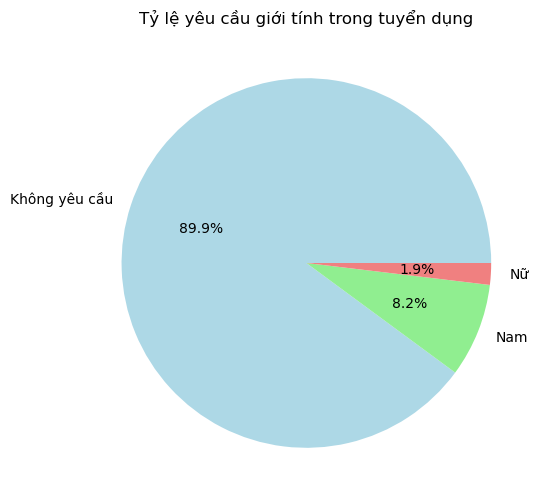

In [59]:
# Đếm số lượng công việc theo yêu cầu về giới tính
gender_count = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Tỷ lệ yêu cầu giới tính trong tuyển dụng')
plt.ylabel('')
plt.show()

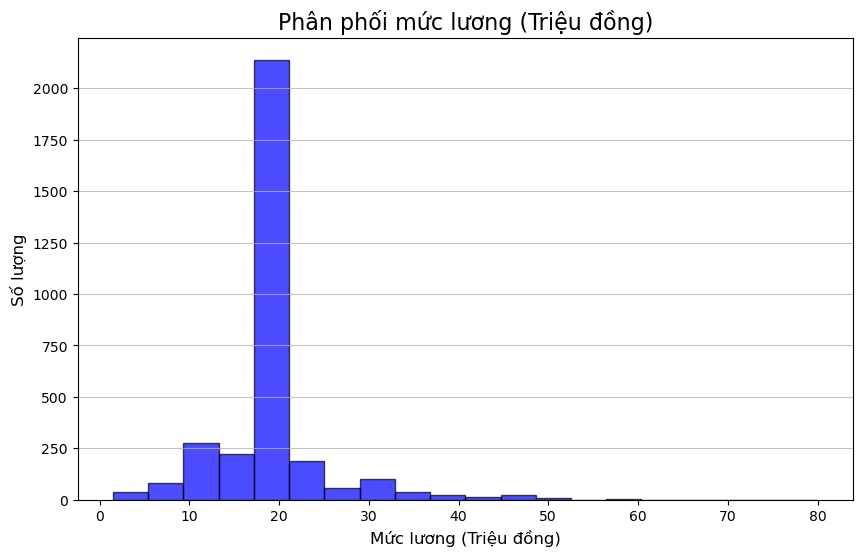

In [85]:
import matplotlib.pyplot as plt

# Thiết lập kích thước hình ảnh
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân phối (Histogram) cho cột salary_trieudong
plt.hist(df['salary_trieudong'], bins=20, alpha=0.7, color='blue', edgecolor='black')

# Thêm tiêu đề và nhãn trục
plt.title('Phân phối mức lương (Triệu đồng)', fontsize=16)
plt.xlabel('Mức lương (Triệu đồng)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị lưới
plt.grid(axis='y', alpha=0.75)
plt.savefig('salary.png')

# Hiển thị biểu đồ
plt.show()

